In [2]:
# IMPORTS
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# **CONFIG BLOCK**

In [3]:
DATA_DIR = "/kaggle/input/lung-disease/Lung X-Ray Image/Lung X-Ray Image"  
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 20
LEARNING_RATE = 0.0001
SPLIT_TRAIN = 0.7
SPLIT_VAL = 0.15
SPLIT_TEST = 0.15

# **DATA PREPROCESSING, MODEL BUILDING AND TRAINING (Padding: valid)**

In [4]:
# DATA PREPROCESSING 
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=SPLIT_VAL + SPLIT_TEST
)

train_gen = datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

# split validation/test
val_test_datagen = ImageDataGenerator(rescale=1./255, validation_split=SPLIT_TEST / (SPLIT_VAL + SPLIT_TEST))

val_gen = val_test_datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

test_gen = val_test_datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


# BUILD VGG16 FROM SCRATCH WITH VALID PADDING 
model = Sequential([
 
    Conv2D(64, (3,3), activation='relu', padding='valid', input_shape=(*IMG_SIZE, 3)),
    Conv2D(64, (3,3), activation='relu', padding='valid'),
    MaxPooling2D((2,2), strides=(2,2)),

    Conv2D(128, (3,3), activation='relu', padding='valid'),
    Conv2D(128, (3,3), activation='relu', padding='valid'),
    MaxPooling2D((2,2), strides=(2,2)),

    
    Conv2D(256, (3,3), activation='relu', padding='valid'),
    Conv2D(256, (3,3), activation='relu', padding='valid'),
    Conv2D(256, (3,3), activation='relu', padding='valid'),
    MaxPooling2D((2,2), strides=(2,2)),

 
    Conv2D(512, (3,3), activation='relu', padding='valid'),
    Conv2D(512, (3,3), activation='relu', padding='valid'),
    Conv2D(512, (3,3), activation='relu', padding='valid'),
    MaxPooling2D((2,2), strides=(2,2)),

    Conv2D(512, (3,3), activation='relu', padding='valid'),
    Conv2D(512, (3,3), activation='relu', padding='valid'),
    Conv2D(512, (3,3), activation='relu', padding='valid'),
    MaxPooling2D((2,2), strides=(2,2)),

    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(train_gen.num_classes, activation='softmax')
])


# COMPILE 
optimizer = Adam(learning_rate=LEARNING_RATE)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# TRAIN 
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_vgg16_model.h5', monitor='val_accuracy', save_best_only=True)

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS,
    callbacks=[early_stop, checkpoint]
)

Found 2433 images belonging to 3 classes.
Found 1738 images belonging to 3 classes.
Found 1737 images belonging to 3 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1763451194.627609      48 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20


I0000 00:00:1763451200.827711     128 service.cc:148] XLA service 0x7e79a4019bf0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1763451200.828726     128 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1763451201.575517     128 cuda_dnn.cc:529] Loaded cuDNN version 90300


 1/77 ━━━━━━━━━━━━━━━━━━━━ 34:02 27s/step - accuracy: 0.3125 - loss: 1.0987

I0000 00:00:1763451223.156434     128 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step - accuracy: 0.3572 - loss: 1.0945

77/77 ━━━━━━━━━━━━━━━━━━━━ 65s 496ms/step - accuracy: 0.3575 - loss: 1.0943 - val_accuracy: 0.5696 - val_loss: 1.0017
Epoch 2/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - accuracy: 0.5849 - loss: 0.9082

77/77 ━━━━━━━━━━━━━━━━━━━━ 19s 250ms/step - accuracy: 0.5857 - loss: 0.9067 - val_accuracy: 0.7388 - val_loss: 0.5903
Epoch 3/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step - accuracy: 0.7576 - loss: 0.5809

77/77 ━━━━━━━━━━━━━━━━━━━━ 19s 249ms/step - accuracy: 0.7576 - loss: 0.5810 - val_accuracy: 0.7526 - val_loss: 0.5917
Epoch 4/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step - accuracy: 0.7826 - loss: 0.5378

77/77 ━━━━━━━━━━━━━━━━━━━━ 19s 251ms/step - accuracy: 0.7827 - loss: 0.5377 - val_accuracy: 0.8228 - val_loss: 0.4318
Epoch 5/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 18s 233ms/step - accuracy: 0.8167 - loss: 0.4572 - val_accuracy: 0.7975 - val_loss: 0.4656
Epoch 6/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step - accuracy: 0.8243 - loss: 0.4316

77/77 ━━━━━━━━━━━━━━━━━━━━ 19s 247ms/step - accuracy: 0.8243 - loss: 0.4316 - val_accuracy: 0.8412 - val_loss: 0.4041
Epoch 7/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - accuracy: 0.8364 - loss: 0.4240

77/77 ━━━━━━━━━━━━━━━━━━━━ 19s 249ms/step - accuracy: 0.8364 - loss: 0.4237 - val_accuracy: 0.8521 - val_loss: 0.3498
Epoch 8/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - accuracy: 0.8593 - loss: 0.3456

77/77 ━━━━━━━━━━━━━━━━━━━━ 19s 246ms/step - accuracy: 0.8592 - loss: 0.3460 - val_accuracy: 0.8631 - val_loss: 0.3462
Epoch 9/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step - accuracy: 0.8586 - loss: 0.3532

77/77 ━━━━━━━━━━━━━━━━━━━━ 19s 248ms/step - accuracy: 0.8586 - loss: 0.3533 - val_accuracy: 0.8642 - val_loss: 0.3452
Epoch 10/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 18s 234ms/step - accuracy: 0.8460 - loss: 0.3671 - val_accuracy: 0.8596 - val_loss: 0.3388
Epoch 11/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step - accuracy: 0.8518 - loss: 0.3362

77/77 ━━━━━━━━━━━━━━━━━━━━ 19s 248ms/step - accuracy: 0.8520 - loss: 0.3360 - val_accuracy: 0.8803 - val_loss: 0.2941
Epoch 12/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - accuracy: 0.8767 - loss: 0.3027

77/77 ━━━━━━━━━━━━━━━━━━━━ 19s 247ms/step - accuracy: 0.8767 - loss: 0.3026 - val_accuracy: 0.8924 - val_loss: 0.2633
Epoch 13/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 18s 232ms/step - accuracy: 0.8860 - loss: 0.2966 - val_accuracy: 0.8849 - val_loss: 0.2758
Epoch 14/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - accuracy: 0.8845 - loss: 0.2883

77/77 ━━━━━━━━━━━━━━━━━━━━ 19s 246ms/step - accuracy: 0.8846 - loss: 0.2882 - val_accuracy: 0.9160 - val_loss: 0.2134
Epoch 15/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - accuracy: 0.9156 - loss: 0.2200

77/77 ━━━━━━━━━━━━━━━━━━━━ 19s 245ms/step - accuracy: 0.9154 - loss: 0.2202 - val_accuracy: 0.9194 - val_loss: 0.2227
Epoch 16/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 18s 233ms/step - accuracy: 0.9120 - loss: 0.2275 - val_accuracy: 0.9125 - val_loss: 0.2099
Epoch 17/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - accuracy: 0.9185 - loss: 0.2072

77/77 ━━━━━━━━━━━━━━━━━━━━ 19s 247ms/step - accuracy: 0.9185 - loss: 0.2074 - val_accuracy: 0.9356 - val_loss: 0.1689
Epoch 18/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 18s 232ms/step - accuracy: 0.9404 - loss: 0.1642 - val_accuracy: 0.9264 - val_loss: 0.1868
Epoch 19/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 18s 231ms/step - accuracy: 0.9185 - loss: 0.1885 - val_accuracy: 0.9212 - val_loss: 0.2032
Epoch 20/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step - accuracy: 0.9316 - loss: 0.1900

77/77 ━━━━━━━━━━━━━━━━━━━━ 19s 250ms/step - accuracy: 0.9316 - loss: 0.1899 - val_accuracy: 0.9442 - val_loss: 0.1448



# **EVALUATION AND METRICS**


55/55 ━━━━━━━━━━━━━━━━━━━━ 12s 211ms/step - accuracy: 0.8469 - loss: 0.4526

 Test Accuracy: 90.73%
 Test Loss: 0.2796
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step

========== Classification Report ==========
                 precision    recall  f1-score   support

   Lung_Opacity     0.9191    0.8292    0.8718       562
         Normal     0.8863    0.9104    0.8982       625
Viral Pneumonia     0.9201    0.9836    0.9508       550

       accuracy                         0.9073      1737
      macro avg     0.9085    0.9077    0.9069      1737
   weighted avg     0.9076    0.9073    0.9063      1737



<Figure size 800x600 with 0 Axes>

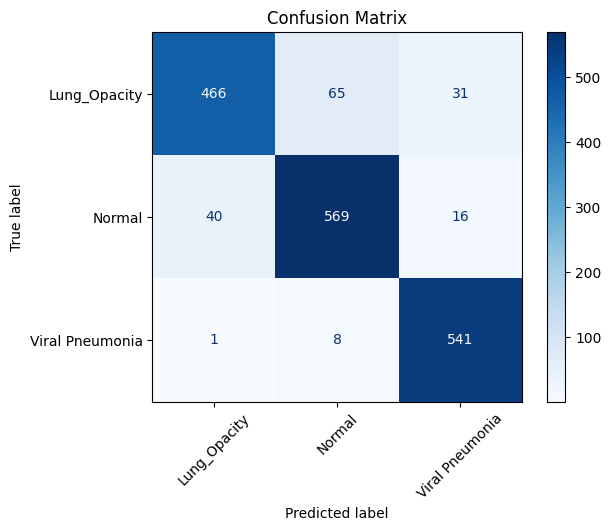

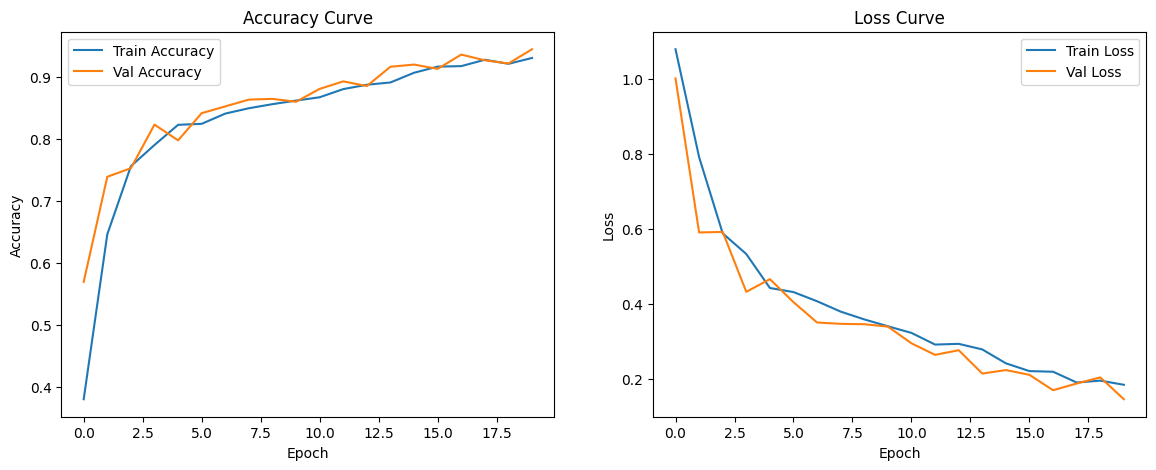

In [5]:
# EVALUATE 

test_loss, test_acc = model.evaluate(test_gen)
print(f"\n Test Accuracy: {test_acc*100:.2f}%")
print(f" Test Loss: {test_loss:.4f}")

# METRICS: CONFUSION MATRIX, PRECISION, RECALL, F1 Score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Get true labels and predictions
Y_true = test_gen.classes
Y_pred_probs = model.predict(test_gen)
Y_pred = np.argmax(Y_pred_probs, axis=1)

# Labels (class names)
class_labels = list(test_gen.class_indices.keys())

# Classification report
print("\n========== Classification Report ==========")
print(classification_report(Y_true, Y_pred, target_names=class_labels, digits=4))

# Confusion matrix
cm = confusion_matrix(Y_true, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)

plt.figure(figsize=(8,6))
disp.plot(cmap='Blues', xticks_rotation=45, values_format='d')
plt.title("Confusion Matrix")
plt.show()


#  PLOTS 
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


# **CONFIG BLOCK**

In [7]:
DATA_DIR = "/kaggle/input/lung-disease/Lung X-Ray Image/Lung X-Ray Image"  
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 20
LEARNING_RATE = 0.0001
SPLIT_TRAIN = 0.7
SPLIT_VAL = 0.15
SPLIT_TEST = 0.15

# **DATA PREPROCESSING, MODEL BUILDING AND TRAINING (Padding: valid & same)**


In [8]:
# DATA PREPROCESSING 
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=SPLIT_VAL + SPLIT_TEST
)

train_gen = datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

# split validation/test
val_test_datagen = ImageDataGenerator(rescale=1./255, validation_split=SPLIT_TEST / (SPLIT_VAL + SPLIT_TEST))

val_gen = val_test_datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

test_gen = val_test_datagen.flow_from_directory(
    DATA_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# BUILD VGG16 WITH MIXED PADDING
model = Sequential([
 
    Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(*IMG_SIZE, 3)),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=(2,2)),

    Conv2D(128, (3,3), activation='relu', padding='same'),
    Conv2D(128, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=(2,2)),

    
    Conv2D(256, (3,3), activation='relu', padding='valid'),
    Conv2D(256, (3,3), activation='relu', padding='valid'),
    Conv2D(256, (3,3), activation='relu', padding='valid'),
    MaxPooling2D((2,2), strides=(2,2)),

 
    Conv2D(512, (3,3), activation='relu', padding='valid'),
    Conv2D(512, (3,3), activation='relu', padding='valid'),
    Conv2D(512, (3,3), activation='relu', padding='valid'),
    MaxPooling2D((2,2), strides=(2,2)),

    Conv2D(512, (3,3), activation='relu', padding='valid'),
    Conv2D(512, (3,3), activation='relu', padding='valid'),
    Conv2D(512, (3,3), activation='relu', padding='valid'),
    MaxPooling2D((2,2), strides=(2,2)),

    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(train_gen.num_classes, activation='softmax')
])


# COMPILE 
optimizer = Adam(learning_rate=LEARNING_RATE)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# TRAIN 
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_vgg16_model.h5', monitor='val_accuracy', save_best_only=True)

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS,
    callbacks=[early_stop, checkpoint]
)

Found 2433 images belonging to 3 classes.
Found 1738 images belonging to 3 classes.
Found 1737 images belonging to 3 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step - accuracy: 0.3623 - loss: 1.0940

77/77 ━━━━━━━━━━━━━━━━━━━━ 61s 470ms/step - accuracy: 0.3623 - loss: 1.0940 - val_accuracy: 0.3596 - val_loss: 1.0967
Epoch 2/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 19s 241ms/step - accuracy: 0.3593 - loss: 1.0975 - val_accuracy: 0.3596 - val_loss: 1.0975
Epoch 3/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 19s 241ms/step - accuracy: 0.3550 - loss: 1.0972 - val_accuracy: 0.3596 - val_loss: 1.0973
Epoch 4/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 19s 242ms/step - accuracy: 0.3370 - loss: 1.0989 - val_accuracy: 0.3596 - val_loss: 1.0814
Epoch 5/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 19s 240ms/step - accuracy: 0.4020 - loss: 1.0704 - val_accuracy: 0.3596 - val_loss: 1.0972
Epoch 6/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - accuracy: 0.3803 - loss: 1.0838

77/77 ━━━━━━━━━━━━━━━━━━━━ 20s 258ms/step - accuracy: 0.3811 - loss: 1.0833 - val_accuracy: 0.5616 - val_loss: 0.8124
Epoch 7/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - accuracy: 0.5891 - loss: 0.8309

77/77 ━━━━━━━━━━━━━━━━━━━━ 20s 258ms/step - accuracy: 0.5897 - loss: 0.8301 - val_accuracy: 0.7589 - val_loss: 0.6054
Epoch 8/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - accuracy: 0.7635 - loss: 0.5714

77/77 ━━━━━━━━━━━━━━━━━━━━ 20s 258ms/step - accuracy: 0.7635 - loss: 0.5713 - val_accuracy: 0.7940 - val_loss: 0.5532
Epoch 9/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - accuracy: 0.7956 - loss: 0.5163

77/77 ━━━━━━━━━━━━━━━━━━━━ 20s 255ms/step - accuracy: 0.7957 - loss: 0.5162 - val_accuracy: 0.8015 - val_loss: 0.5089
Epoch 10/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - accuracy: 0.8061 - loss: 0.4914

77/77 ━━━━━━━━━━━━━━━━━━━━ 20s 254ms/step - accuracy: 0.8063 - loss: 0.4911 - val_accuracy: 0.8239 - val_loss: 0.4439
Epoch 11/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - accuracy: 0.8195 - loss: 0.4569

77/77 ━━━━━━━━━━━━━━━━━━━━ 20s 256ms/step - accuracy: 0.8193 - loss: 0.4573 - val_accuracy: 0.8343 - val_loss: 0.4261
Epoch 12/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - accuracy: 0.8216 - loss: 0.4465

77/77 ━━━━━━━━━━━━━━━━━━━━ 20s 255ms/step - accuracy: 0.8216 - loss: 0.4463 - val_accuracy: 0.8521 - val_loss: 0.3874
Epoch 13/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - accuracy: 0.8449 - loss: 0.3848

77/77 ━━━━━━━━━━━━━━━━━━━━ 20s 257ms/step - accuracy: 0.8448 - loss: 0.3850 - val_accuracy: 0.8539 - val_loss: 0.3674
Epoch 14/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - accuracy: 0.8559 - loss: 0.3723

77/77 ━━━━━━━━━━━━━━━━━━━━ 20s 256ms/step - accuracy: 0.8559 - loss: 0.3722 - val_accuracy: 0.8694 - val_loss: 0.3433
Epoch 15/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 19s 240ms/step - accuracy: 0.8727 - loss: 0.3362 - val_accuracy: 0.8573 - val_loss: 0.3638
Epoch 16/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 19s 241ms/step - accuracy: 0.8681 - loss: 0.3413 - val_accuracy: 0.8654 - val_loss: 0.3372
Epoch 17/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - accuracy: 0.8657 - loss: 0.3263

77/77 ━━━━━━━━━━━━━━━━━━━━ 20s 256ms/step - accuracy: 0.8657 - loss: 0.3264 - val_accuracy: 0.8930 - val_loss: 0.2868
Epoch 18/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - accuracy: 0.8777 - loss: 0.3128

77/77 ━━━━━━━━━━━━━━━━━━━━ 20s 258ms/step - accuracy: 0.8777 - loss: 0.3129 - val_accuracy: 0.8976 - val_loss: 0.2754
Epoch 19/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 19s 242ms/step - accuracy: 0.8917 - loss: 0.2969 - val_accuracy: 0.8930 - val_loss: 0.2733
Epoch 20/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - accuracy: 0.9020 - loss: 0.2464

77/77 ━━━━━━━━━━━━━━━━━━━━ 20s 258ms/step - accuracy: 0.9019 - loss: 0.2466 - val_accuracy: 0.9125 - val_loss: 0.2239



# **EVALUATION AND METRICS**


55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 119ms/step - accuracy: 0.8861 - loss: 0.2905

 Test Accuracy: 90.50%
 Test Loss: 0.2537
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step

========== Classification Report ==========
                 precision    recall  f1-score   support

   Lung_Opacity     0.8525    0.8843    0.8681       562
         Normal     0.8987    0.8656    0.8818       625
Viral Pneumonia     0.9674    0.9709    0.9691       550

       accuracy                         0.9050      1737
      macro avg     0.9062    0.9070    0.9064      1737
   weighted avg     0.9055    0.9050    0.9050      1737



<Figure size 800x600 with 0 Axes>

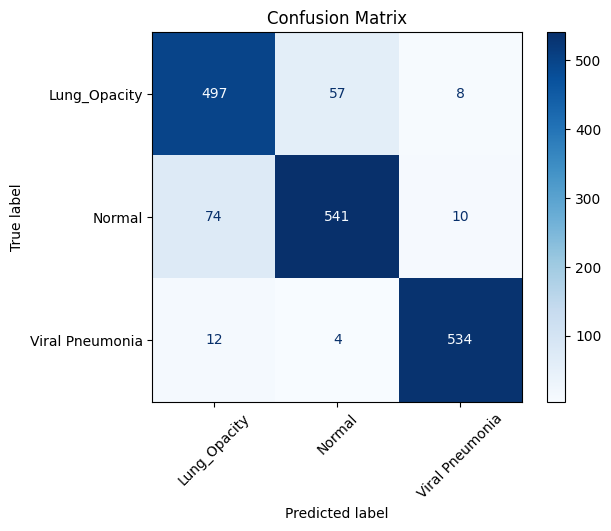

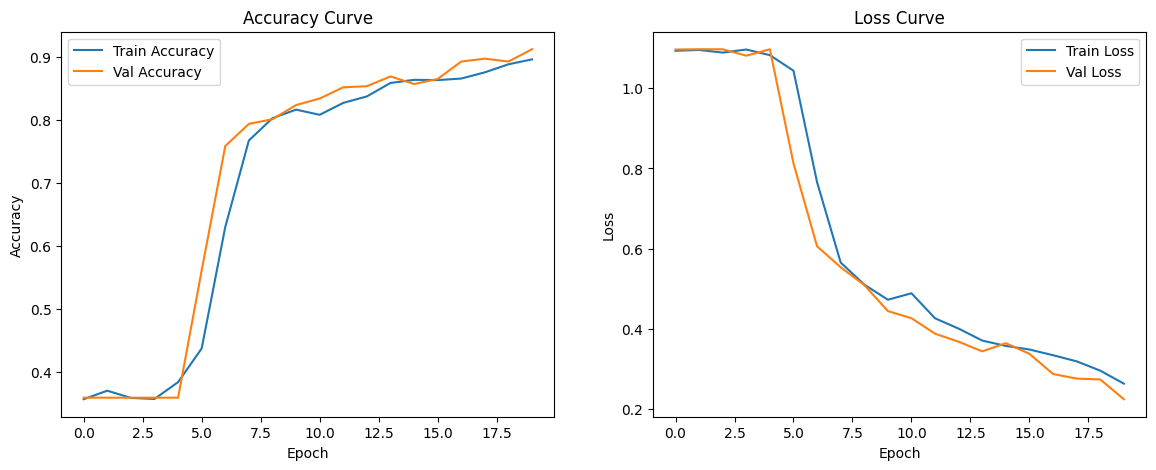

In [9]:
# EVALUATE 

test_loss, test_acc = model.evaluate(test_gen)
print(f"\n Test Accuracy: {test_acc*100:.2f}%")
print(f" Test Loss: {test_loss:.4f}")

# METRICS: CONFUSION MATRIX, PRECISION, RECALL, F1 Score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Get true labels and predictions
Y_true = test_gen.classes
Y_pred_probs = model.predict(test_gen)
Y_pred = np.argmax(Y_pred_probs, axis=1)

# Labels (class names)
class_labels = list(test_gen.class_indices.keys())

# Classification report
print("\n========== Classification Report ==========")
print(classification_report(Y_true, Y_pred, target_names=class_labels, digits=4))

# Confusion matrix
cm = confusion_matrix(Y_true, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)

plt.figure(figsize=(8,6))
disp.plot(cmap='Blues', xticks_rotation=45, values_format='d')
plt.title("Confusion Matrix")
plt.show()


#  PLOTS 
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()
